

# Overview 

The goal is to demonstrate how to build a **Stereo Computation Pipeline** in OpenCV 

This kind of pipeline has the following interface 

- Input: Rectified Image Pair 
  - **Note**: Rectification is a critical requirement for Stereo Matching to work 
- Output: Disparity Image (DSI)


Let's to compute DSI on the [Middlebury Dataset - Motorbike Image Pair](http://vision.middlebury.edu/stereo/data/scenes2014/datasets/Motorcycle-imperfect/)
 




# Dataset Download 

Direct download


In [0]:
# To download the dataset
!wget http://vision.middlebury.edu/stereo/data/scenes2014/datasets/Motorcycle-imperfect/im0.png
!wget http://vision.middlebury.edu/stereo/data/scenes2014/datasets/Motorcycle-imperfect/im1.png


In [0]:
!ls

im0.png  im1.png  sample_data



# Datatset Load 

In memory representation is needed 


In [0]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [0]:
# Load both the images in Grayscale 
imgL = cv2.imread('im0.png',0)
imgR = cv2.imread('im1.png',0)

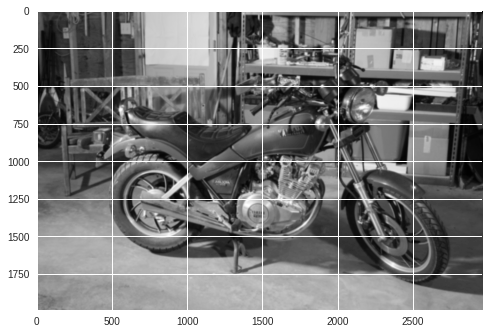

In [0]:
# Check
plt.imshow(imgL, cmap = 'gray', interpolation = 'bicubic')
plt.show()



# Stereo Engine 

Instantiation of different Stereo Engine, provided by OpenCV, so I can switch easily between them with a simple assignment 

## Notes 

- Let's use just a Random Stereo Setup as the goal is just to demonstrate how to build a Stereo Computation Pipeline in OpenCV 


In [0]:
stereo1 = cv2.StereoBM_create(numDisparities=112, blockSize=31)

In [0]:
stereo3 = cv2.StereoSGBM_create(
    minDisparity = min_disp,
    numDisparities = num_disp,
    #SADWindowSize = window_size,
    uniquenessRatio = 10,
    speckleWindowSize = 100,
    speckleRange = 32,
    disp12MaxDiff = 1,
    P1 = 8*3*window_size**2,
    P2 = 32*3*window_size**2,
    #fullDP = False
)

In [0]:
stereo = stereo3


# Disparity Computation 

Disparity Computation on Image Pair 



## Actual Computation 


In [0]:
window_size = 5
min_disp = 32
num_disp = 112-min_disp

disparity = stereo.compute(imgL, imgR).astype(np.float32) / 16.0
disparity = (disparity-min_disp)/num_disp

In [0]:
disparity.dtype

dtype('float32')

In [0]:
disparity.size

5892432


## Negative Disparities 

- Negative Disparities represent failure in the processing pipeline 

- Let's check the negative disparity values percentage over the total to get a rough idea of the performance 


In [0]:
# Percentage of negative disparity 
disparity[disparity<0].size/disparity.size


0.41963437168218487


## Numerical Fixing for Plotting 

- Plotting provided by Matplotlin does not like working with float, it prefers uint8 so let's performa the conversion 

Numerical Conversion 

- Remove Negative Values setting these ones to zero
- Scale the [0,1] float disparities to [0, max_color] uint8 values to plot a grayscale image 


In [0]:
disparity[disparity<0] = 0

In [0]:
disparity.min()

0.0

In [0]:
disparity.max()

0.9875


# Disparity Plot 

- Rescale in Grayscale according to DSI Value 
- Use unit8 which is more plot friendly than float 


In [0]:
color_max = 50
dsi_plot = np.uint8(disparity*color_max)

In [0]:
dsi_plot[1000,1000]

0

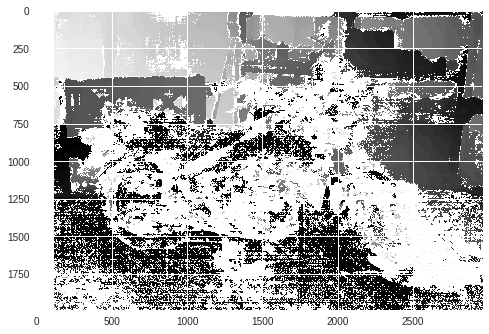

In [0]:
plt.imshow(dsi_plot)
plt.show()